# Quick start: initializing, adding data, runing and saving your PyWGCNA

First, make sure to [install PyWGCNA](https://github.com/mortazavilab/PyWGCNA#readme).

Then, download the data from [here](http://hubble.bio.uci.edu/nargesr/5xFAD_paper/).

For this tutorial, we will be analyzing the TPM matrix of 5xFAD mouse from [MODEL-AD](https://www.model-ad.org/) portal and [this paper](https://www.nature.com/articles/s41597-021-01054-y) in Scientific Data which has 5548 genes and 193 samples in four different time point.

## Setupping up PyWGCNA object

We use the TPM matrix to create a PyWGCNA object. The object serves as a container that contains both data (like the TPM matrix) and analysis (like clustering, or visualizing results) for a Bulk RNA-seq dataset. For a technical discussion of the PyWGCNA object structure, check out our [GitHub Wiki](https://github.com/mortazavilab/PyWGCNA.wiki.git). For example, the raw TPM matrix is stored in `GeneExp` class.

In [7]:
import PyWGCNA
geneExp = '5xFAD_paper/expressionList_sorted'
pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='5xFAD',
                              geneExpPath=geneExp, 
                              sep='\t', save=True)
#pyWGCNA_5xFAD.expressionList.head(5)
pyWGCNA_5xFAD.expressionList.shape[1]

Saving data to be True, checking requirements ...


192

## Pre-processing workflow

PyWGCNA allows you to easily preproces the data including removing genes with too many missing values or really low expressed across samples(in default we suggest to remove genes without any expression more than 1 TPM) and also removing samples with too many missing values or not matched with. 

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



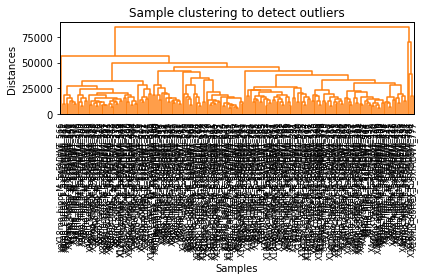

In [2]:
pyWGCNA_5xFAD.TPMcutoff
#ABI3.cut = cut
pyWGCNA_5xFAD.preprocess()
#pyWGCNA_5xFAD.expressionList.head(5)

# Clustering data

Saving data to be True, checking requirements ...
Pre processing...
	Detecting genes and samples with too many missing values...
Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2194
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.011869  0.190761       0.785501  2886.399671  2881.035006   
1       2  0.365749  -0.82836       0.916438  1047.792562   956.811729   
2       3  0.725503 -1.370225       0.956383   480.391367   384.286824   
3       4  0.834685 -1.599769       0.960714   255.565397   179.924354   
4       5  0.885821 -1.687502       0.962468   150.730061    91.670867   
5       6  0.913168 -1.709051       0.963403    95.842073    49.756373   
6       7  0.884317 -1.781186       0.932658    64.506154    28.810822   
7       8  0.874786 -1.806566       0.920836    45.379673    17.622977   
8       9  0.874302 -1.808315        0.91948    33.071383    11.047045   
9      10  0.863853 -1.81626

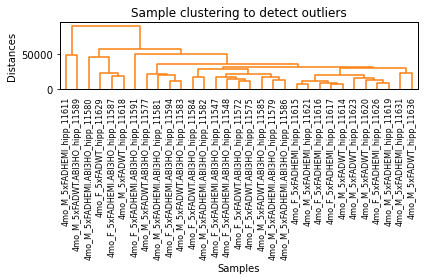

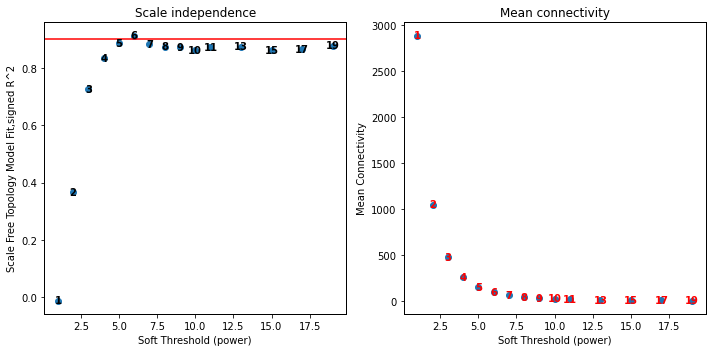

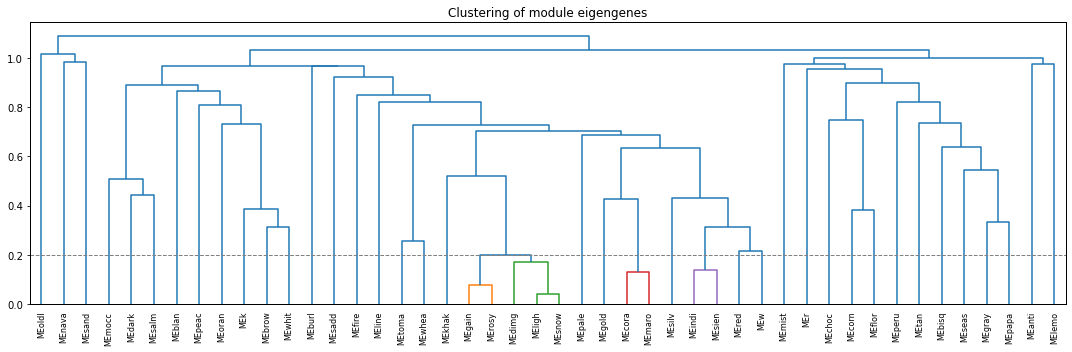

In [2]:

ABI3 = ABI3.runWGCNA()
ABI3.save_WGCNA()

# Read WGCNA

In [5]:
ABI3 = PyWGCNA.read_WGCNA("ABI3.p")

Reading WGCNA done!


# Analyse WGCNA


In [6]:
ABI3.addSampleInfo(path='5xFAD_ABI3/metaData', sep='\t')
# add color for metadata
ABI3.setMetadataColor('Sex', {'Female': 'green',
                                 'Male': 'yellow'})
ABI3.setMetadataColor('Genotype', {'5xFADHEMI': 'purple',
                                   '5xFADHEMI_ABI3HO': 'cyan',
                                   '5xFADWT': 'darkviolet',
                                   '5xFADWT_ABI3HO': 'deeppink'})
ABI3.setMetadataColor('age', {'4mon': 'blue'})
ABI3.setMetadataColor('Tissue', {'Hippocampus': 'red'})
ABI3 = ABI3.analyseWGCNA()
ABI3.save_WGCNA()

Analysing WGCNA...
calculating module trait relationship ...
	Done..

Adding genes for each modules ...
	Done..

Saving WGCNA as ABI3.p
